## Dataset comprises of used cars sold on cardehko.com in India as well as important features of these cars.

#### The dataset consist of 8 columns and 4340 rows.

##### Following details of cars are included in the dataset:
- Car name : Car's Full name, which includes brand and specific model name.
- Year : Car's Purchase year.
- Selling Price : Selling price of the car.
- Kms driven : Kilometers driven by the car.
- Fuel : Fuel type used in the car.
- Seller type : Which Type of seller is selling the used car
- Transmission : Transmission used in the car.
- Owner : Car Owner type.

#### Importing Numpy,Pandas, Matplotlib, Seaborn and Warningd library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

#### Reading the dataset

In [2]:
df=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

#### Show top 5 records

In [3]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


#### Shape of dataset

In [4]:
df.shape

(4340, 8)

#### Summary of dataset

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


#### Check datatypes of dataset

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
 8   brand          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


#### Checking Null Values

# Data Visualization

In [24]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
brand            0
dtype: int64

### Most selling car

In [25]:
df.name.value_counts()[0:10]

Maruti Swift Dzire VDI      69
Maruti Alto 800 LXI         59
Maruti Alto LXi             47
Maruti Alto LX              35
Hyundai EON Era Plus        35
Maruti Swift VDI BSIV       29
Maruti Wagon R VXI BS IV    29
Maruti Swift VDI            27
Hyundai EON Magna Plus      24
Maruti Wagon R LXI Minor    24
Name: name, dtype: int64

### Most selling car is Maruti Swift Dzire VDI

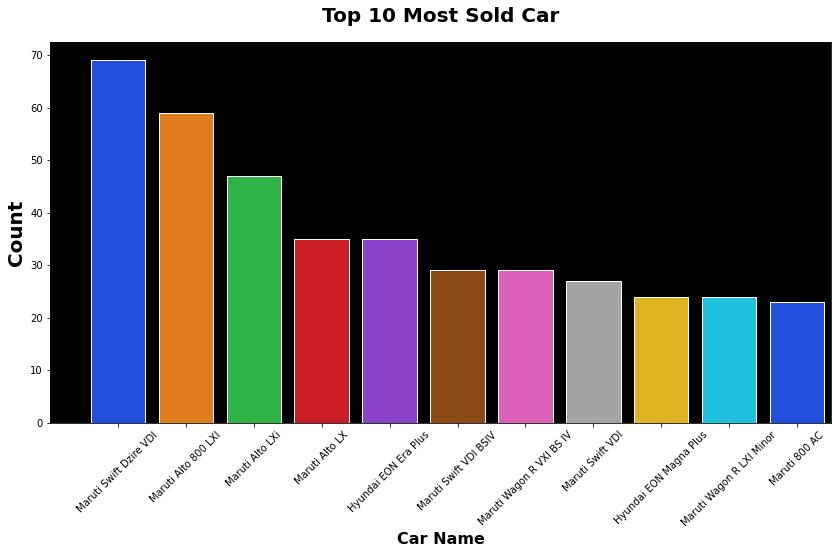

In [38]:
plt.subplots(figsize=(14,7))
plt.rcParams['axes.facecolor'] = 'black'
sns.countplot(x="name", data=df,ec = "white",palette="bright",order = df['name'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

### Check mean price of Maruti Swift Dzire VDI which is most sold

In [39]:
i20 = df[df['name'] == 'Maruti Swift Dzire VDI']['selling_price'].mean()
print(f'The mean price of Maruti Swift Dzire VDI is {i20:.2f} Rupees')

The mean price of Maruti Swift Dzire VDI is 511463.74 Rupees


#### Insights:
- As per dataset this are the most selling cars.
- The most sold car is Maruti Swift Dzire VDI followed by Maruti Alto 800 LXI.
- Mean price of Maruti Swift Dzire VDI is 5.1 lakhs


### Most Selling brand

In [40]:
df['brand']= df.name.apply(lambda x: ''.join(x.split(' ')[0]) )   #This code creates a separate column 'name' in which car make model gets separated from the column. And creates the new column 'brand'.
df['brand']

0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: brand, Length: 4340, dtype: object

In [29]:
df.brand.value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: brand, dtype: int64

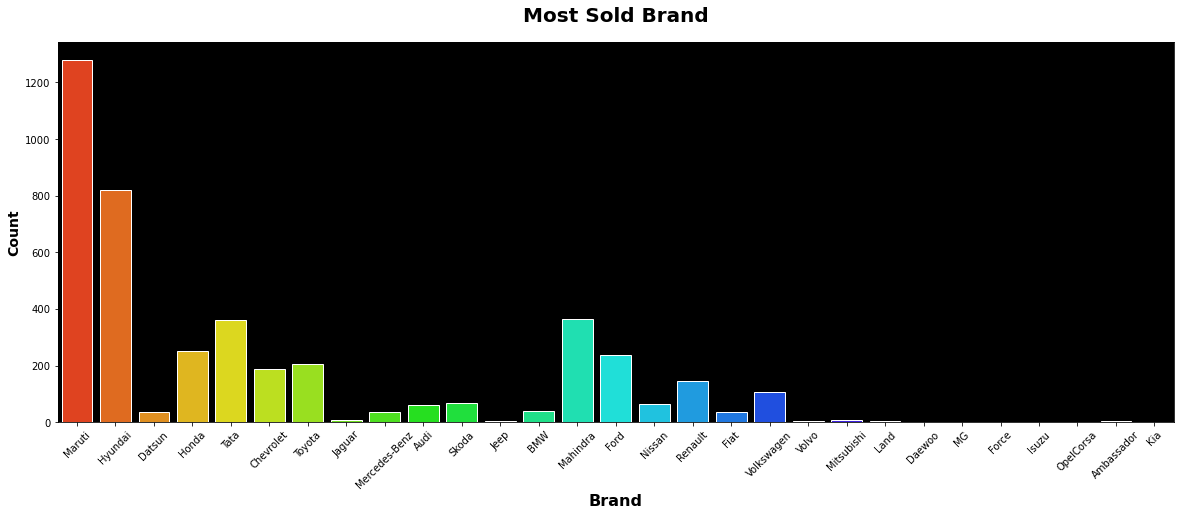

In [37]:
plt.subplots(figsize=(20,7))
sns.countplot(x='brand',data=df,ec='white',palette='hsv')
plt.rcParams['axes.facecolor'] = 'black'
plt.title("Most Sold Brand", weight="bold",fontsize=20,pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.show()

In [31]:
maruti = df[df['brand'] == 'Maruti']['selling_price'].mean()
print(f'The mean price of Maruti is {maruti:.2f} Rupees')

The mean price of Maruti is 342416.30 Rupees


#### Insights:
- The most selling brand is Maruti followed by hyundai & Mahindra.
- Least sold brands are Daewoo,Force,Isuzu and Kia.
- The mean prices of Maruti brand is 3.4 Lakh rupees.

### Costliest Brand 

In [42]:
brand = df.groupby('brand').selling_price.max()
brand_df = brand.to_frame().sort_values('selling_price',ascending=False)[0:10] #This line of code perform groupby operation on column brand and selling price
brand_df

,selling_price
brand,
Audi,8900000
Mercedes-Benz,8150000
BMW,4950000
Volvo,4500000
Land,4200000
Ford,3200000
Toyota,3200000
Mahindra,2700000
Jaguar,2550000


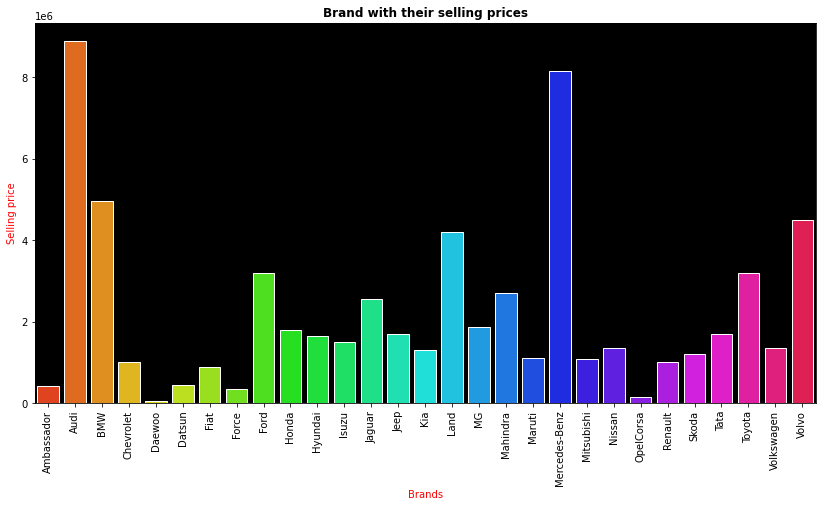

In [33]:
plt.subplots(figsize=(14,7))

sns.barplot(data=df,x=brand.index, y=brand.values,ec='white', palette="hsv")
plt.xticks(rotation=90)
plt.xlabel("Brands",fontsize=10,color="RED")
plt.ylabel("Selling price",fontsize=10,color="RED")
plt.title("Brand with their selling prices",weight='bold',color="black")
plt.show()

#### Insights:
- Costliest brand sold is Audi.
- Second costliest brand sold is Mercedes-Benz.
- Least costliest brand is Opelcorsa and Daewoo

### Most car sold in a year

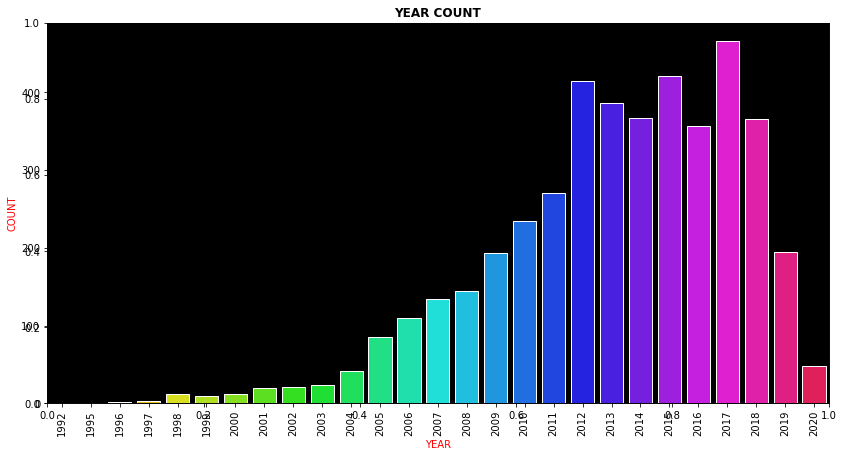

In [21]:
plt.subplots(figsize=(14,7))
ax = plt.axes()
ax.set_facecolor("black")
sns.countplot(data=df,x="year",ec = 'white',palette="hsv")
plt.xticks(rotation=90)
plt.xlabel("YEAR",fontsize=10,color="RED")
plt.ylabel("COUNT",fontsize=10,color="RED")
plt.title("YEAR COUNT",color="black",weight ='bold')
plt.show()

#### Insight:
- Most number of cars sales are made in year 2017.
- It is obvious that the car sales were least in year 2020 due to covid-19 pandemic.


### Fuel Types offered in each brand and there count

In [27]:
df.fuel.value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

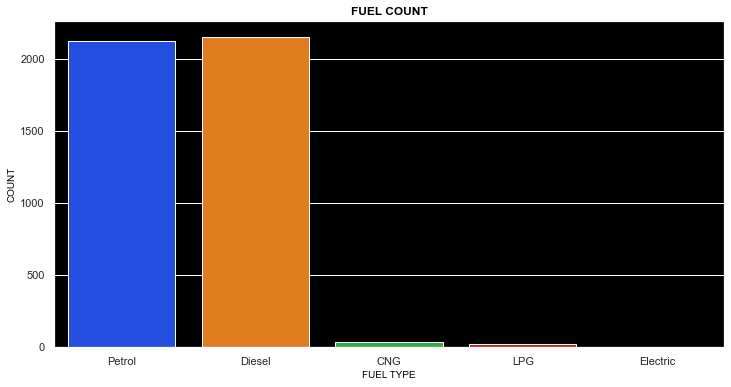

In [28]:
plt.subplots(figsize=(12,6))
sns.countplot(data=df,x="fuel",ec = 'white',palette="bright")
plt.xlabel("FUEL TYPE",fontsize=10,color="black")
plt.ylabel("COUNT",fontsize=10,color="black") 
plt.title("FUEL COUNT",color="black",weight='bold') 
plt.show()

### Fuel type and there selling prices

In [29]:
fuel = df.groupby('fuel')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()

,selling_price
fuel,
Diesel,500000.0
Electric,310000.0
Petrol,269000.0
CNG,247500.0
LPG,180000.0


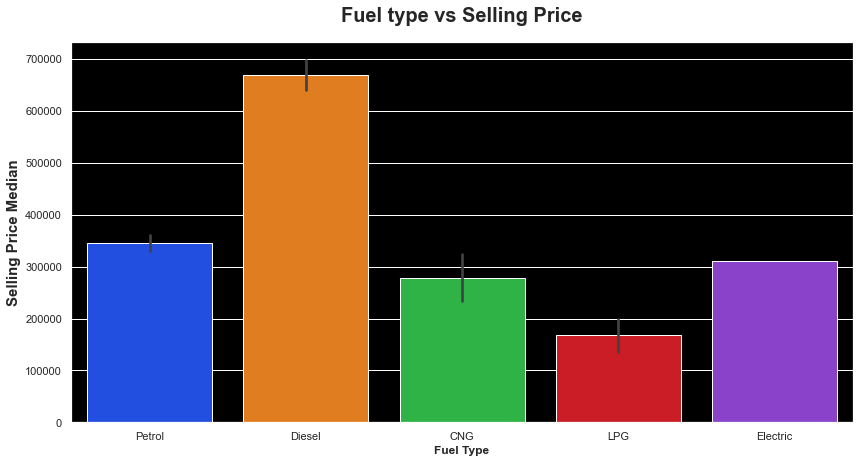

In [30]:
plt.subplots(figsize=(14,7))
sns.barplot(x=df.fuel, y=df.selling_price, ec = "white", palette="bright")
plt.title("Fuel type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price Median", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

#### Insights:
- Petrol and diesel dominates the used car market.
- The most sold fuel type Vehicle is Diesel followed by petrol and CNG and least sold is Electric.
- Diesel vehicles have the highest selling prices followed by Petrol and Electric.

### Car ownership count 

In [6]:
df.owner.value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

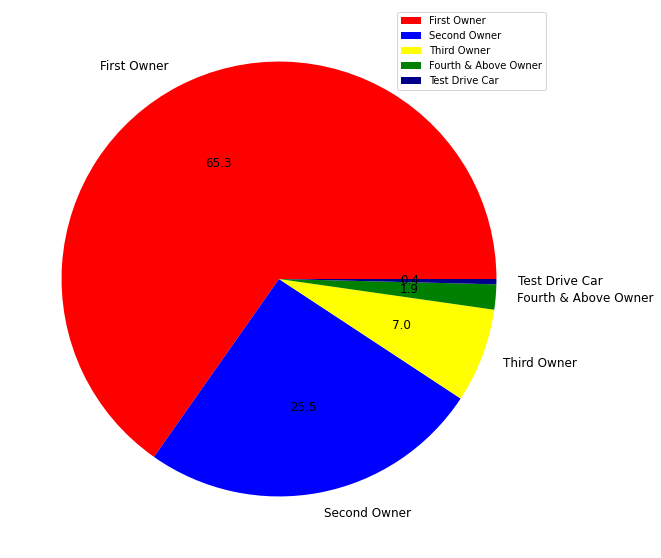

In [7]:
plt.figure(figsize=(15,10))
plt.pie(df.owner.value_counts(), labels= df.owner.value_counts().index, autopct='%.1f',  textprops={"fontsize":12},colors=({"darkblue","blue",'red','green','yellow'}))
plt.legend()

#### Insight:
- The most number of cars sold are first hand followed by second hand.
- Test drive cars are least preferred.


### Seller Type

In [8]:
df.seller_type.value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

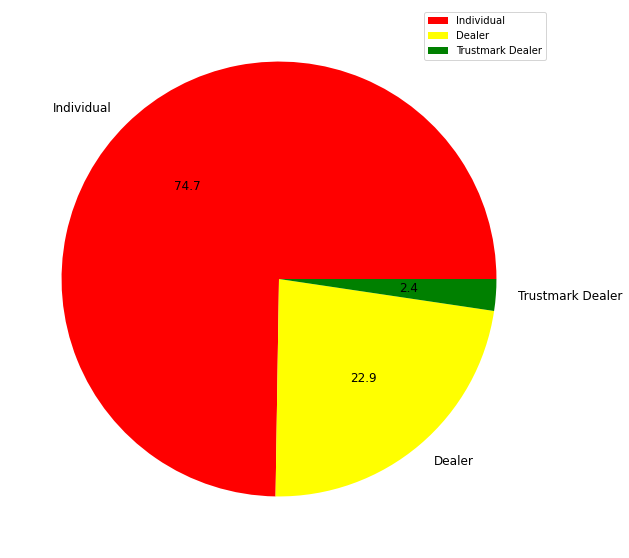

In [10]:
plt.figure(figsize=(15,10))
plt.pie(df.seller_type.value_counts(), labels= df.seller_type.value_counts().index, autopct='%.1f',  textprops={"fontsize":12},colors=({"darkblue","red",'yellow','green','pink'}))
plt.legend()

In [11]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Trustmark Dealer,750000.0
Dealer,495000.0
Individual,300000.0


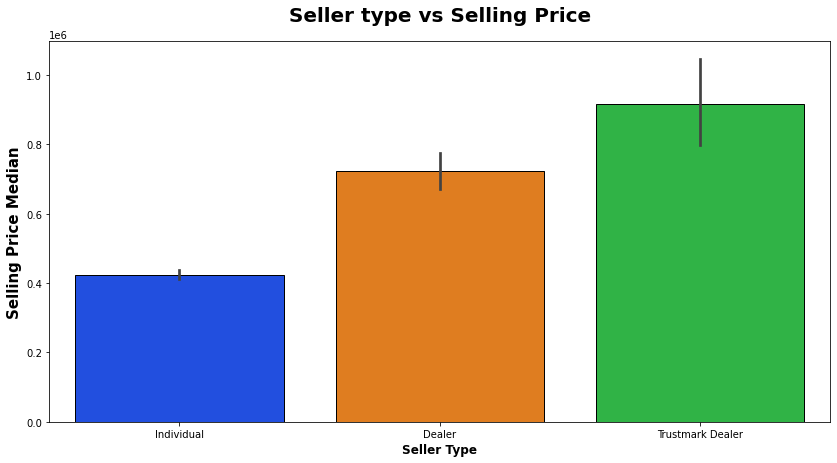

In [12]:
plt.subplots(figsize=(14,7))
sns.barplot(x=df.seller_type, y=df.selling_price, ec = "black", palette="bright")
plt.title("Seller type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price Median", weight="bold", fontsize=15)
plt.xlabel("Seller Type", weight="bold", fontsize=12)
plt.show()

#### Insights:
- Most of the sales are made individually i.e 75%, followed by Dealers.
- Trustmark Dealers have more median selling price than Dealer and Individual.

### Transmission Type

In [13]:
df.transmission.value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

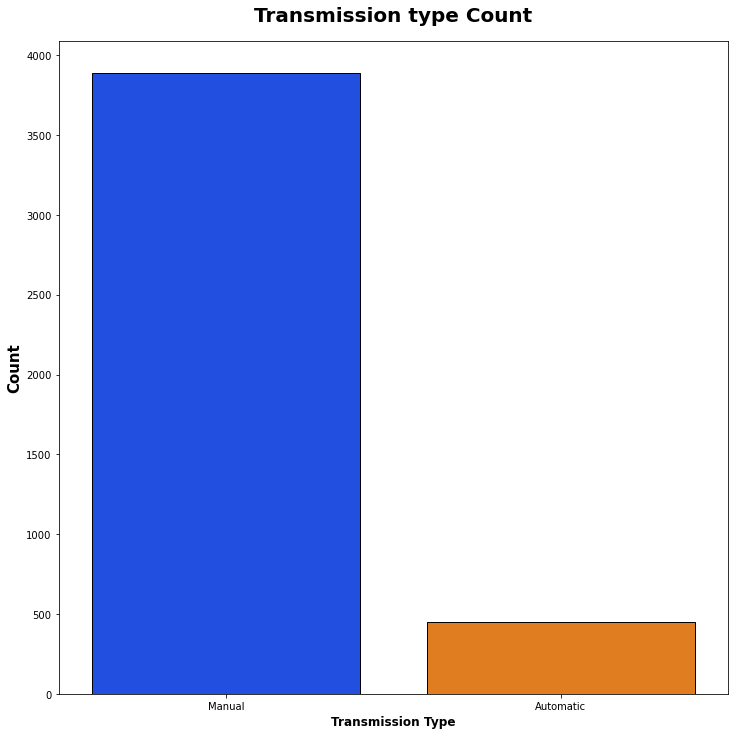

In [15]:
plt.subplots(figsize=(12,12))
sns.countplot(x='transmission', data=df,palette="bright",ec='black')
plt.title("Transmission type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show()

### Transmission type and selling price 

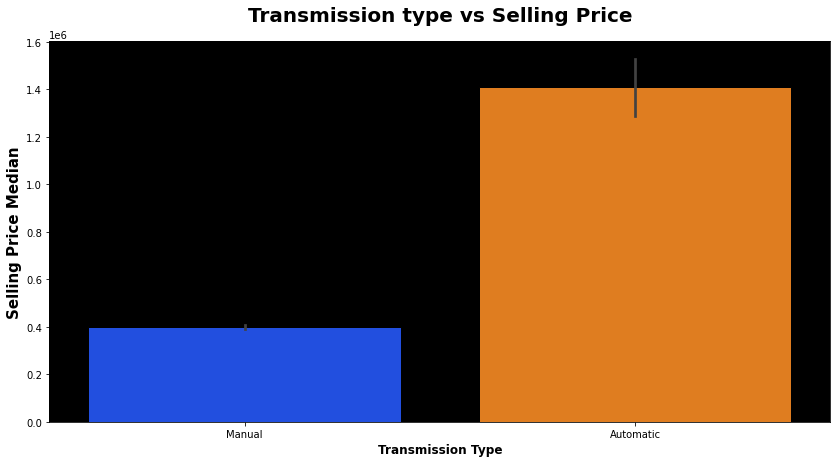

In [46]:
plt.subplots(figsize=(14,7))
sns.barplot(x=df.transmission, y=df.selling_price, ec = "black", palette="bright")
plt.title("Transmission type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price Median", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show()

#### Insights:
- Most number of cars which was sold are manual.
- Automatic cars are costly and have more selling price.

### Brands with most km driven

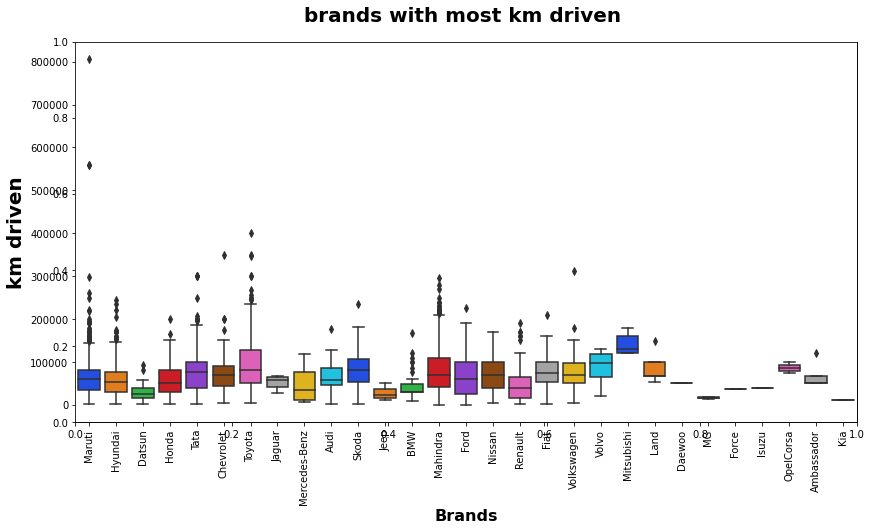

In [18]:
plt.subplots(figsize=(14,7))
ax = plt.axes()
ax.set_facecolor("white")
sns.boxplot(x=df.brand, y= df.km_driven, palette="bright")
plt.title("brands with most km driven ", weight="bold",fontsize=20, pad=20)
plt.ylabel("km driven", weight="bold", fontsize=20)
plt.xlabel("Brands", weight="bold", fontsize=16)

plt.xticks(rotation=90)
plt.show()

#### Insights:
- Most driven vehicle which is sold is maruti which also makes it more relaible.


### Wordcloud of Brands

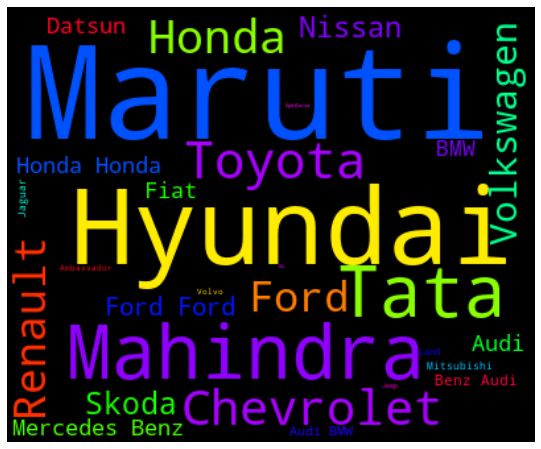

In [19]:
from wordcloud import WordCloud, STOPWORDS
text = ' '.join(df['brand'])
word_cloud = WordCloud(width=400,
                      height=330,
                      max_words=150,
                      colormap='hsv',
                      collocations=True).generate(text)
plt.figure(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Final Results
- The dataset was pretty cleaned with zero null values.
- The most sold brand is Maruti and Maruti Swift Dzire VDI is the most sold car.
- Most number of sales were made in year 2017.
- Most of the sales are made by individual where trustmark dealers have high selling price.
- Manual cars are mostly sold and automatic has higher selling average than manual cars.
- Diesel and Petrol are most preferred fuel type where diesel vehicles have the high selling prices.
- The number of vehicles sold are generally first hand vehicle.
